In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv("./datasets/coaster_db.csv")
print(df.shape)
df.head(5)

(1087, 56)


,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [3]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [4]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [5]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [6]:
df = df[['coaster_name',
    # 'Length', 'Speed',
    'Location', 'Status',
    # 'Opening date',
    #    'Type',
    'Manufacturer',
    # 'Height restriction', 'Model', 'Height',
    # 'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
    # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    # 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    # 'Track layout', 'Fastrack available', 'Soft opening date.1',
    # 'Closing date', 'Opened', 'Replaced by', 'Website',
    # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    # 'Single rider line available', 'Restraint Style',
    # 'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
    'year_introduced',
    'latitude', 'longitude', 'Type_Main',
    'opening_date_clean',
    # 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
    'speed_mph', 
    # 'height_value', 'height_unit',
    'height_ft',
    'Inversions_clean', 'Gforce_clean']].copy()

In [7]:
df.columns, df.dtypes

(Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
        'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
        'height_ft', 'Inversions_clean', 'Gforce_clean'],
       dtype='object'),
 coaster_name           object
 Location               object
 Status                 object
 Manufacturer           object
 year_introduced         int64
 latitude              float64
 longitude             float64
 Type_Main              object
 opening_date_clean     object
 speed_mph             float64
 height_ft             float64
 Inversions_clean        int64
 Gforce_clean          float64
 dtype: object)

In [8]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [9]:
df = df.rename(columns={'coaster_name': 'Coaster_name',
                   'year_introduced': 'Year_introduced',
                   'opening_date_clean': 'Opening_date',
                   'latitude': 'Latitude',
                   'longitude': 'Longitude',
                   'Inversions_clean': 'Inversions',
                   'Gforce_clean': 'Gforce',
                   'speed_mph': 'Speed_mph'})

In [10]:
df.columns

Index(['Coaster_name', 'Location', 'Status', 'Manufacturer', 'Year_introduced',
       'Latitude', 'Longitude', 'Type_Main', 'Opening_date', 'Speed_mph',
       'height_ft', 'Inversions', 'Gforce'],
      dtype='object')

In [11]:
df.isna().sum()

Coaster_name         0
Location             0
Status             213
Manufacturer        59
Year_introduced      0
Latitude           275
Longitude          275
Type_Main            0
Opening_date       250
Speed_mph          150
height_ft          916
Inversions           0
Gforce             725
dtype: int64

In [12]:
df.loc[df.duplicated(subset=['Coaster_name'])].head(5)

,Coaster_name,Location,Status,Manufacturer,Year_introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [13]:
df = df.loc[~df.duplicated(subset=['Coaster_name', 'Location', 'Opening_date'])].reset_index(drop=True).copy()

Text(0, 0.5, 'Year')

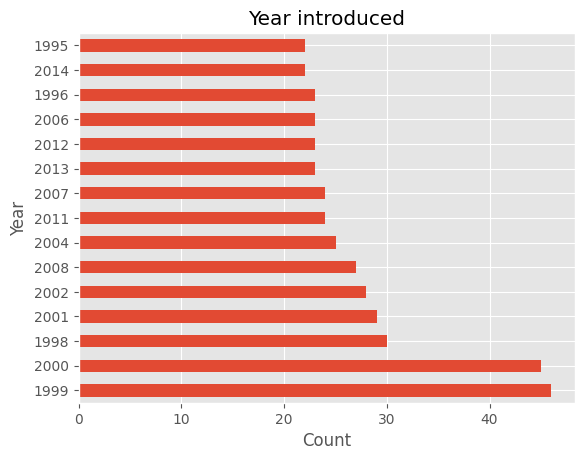

In [14]:
ax = df['Year_introduced'].value_counts() \
    .head(15) \
    .plot(kind='barh', title='Year introduced')
ax.set_xlabel('Count')
ax.set_ylabel('Year')

Text(0.5, 0, 'Speed (mph)')

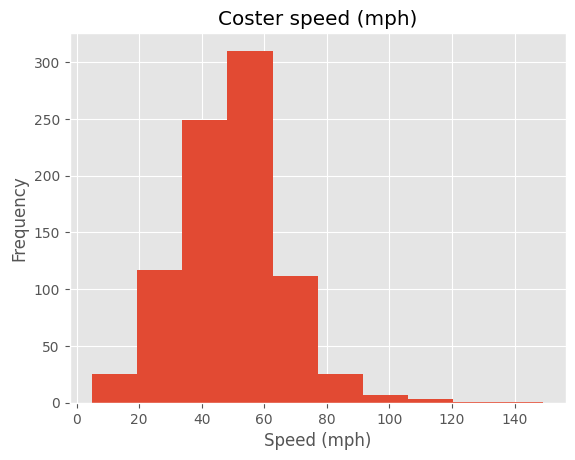

In [28]:
ax = df['Speed_mph'].plot(kind='hist', title='Coster speed (mph)')
ax.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

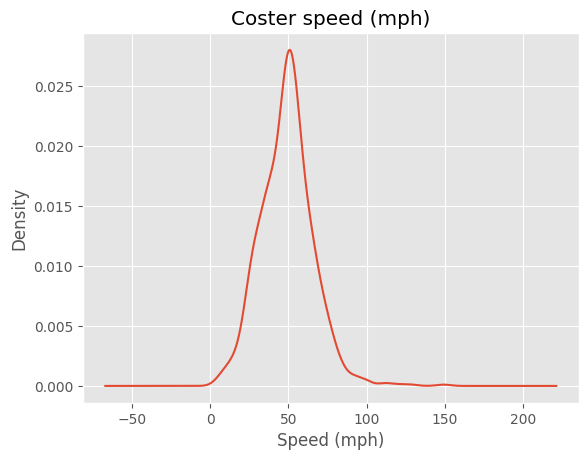

In [29]:
ax = df['Speed_mph'].plot(kind='kde', title='Coster speed (mph)')
ax.set_xlabel('Speed (mph)')

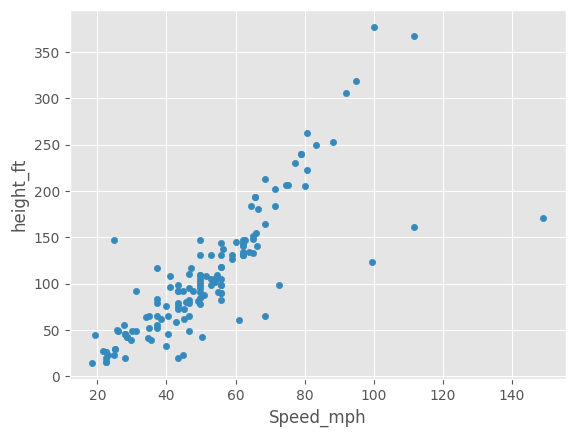

In [33]:
df.plot(kind='scatter',
        x='Speed_mph',
        y='height_ft')
plt.show()

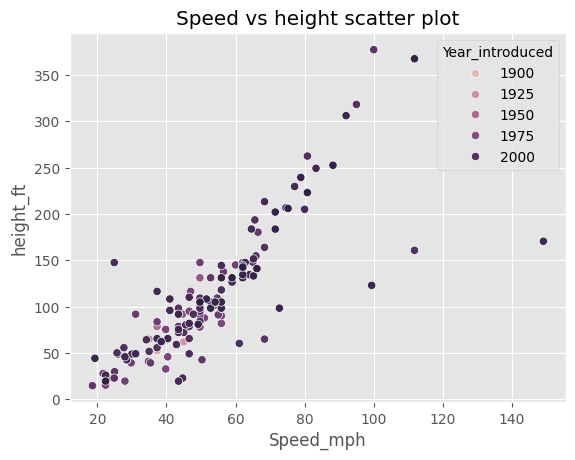

In [41]:
sns.scatterplot(data=df,
                x='Speed_mph',
                y='height_ft',
                hue='Year_introduced').set_title("Speed vs height scatter plot")
plt.show()

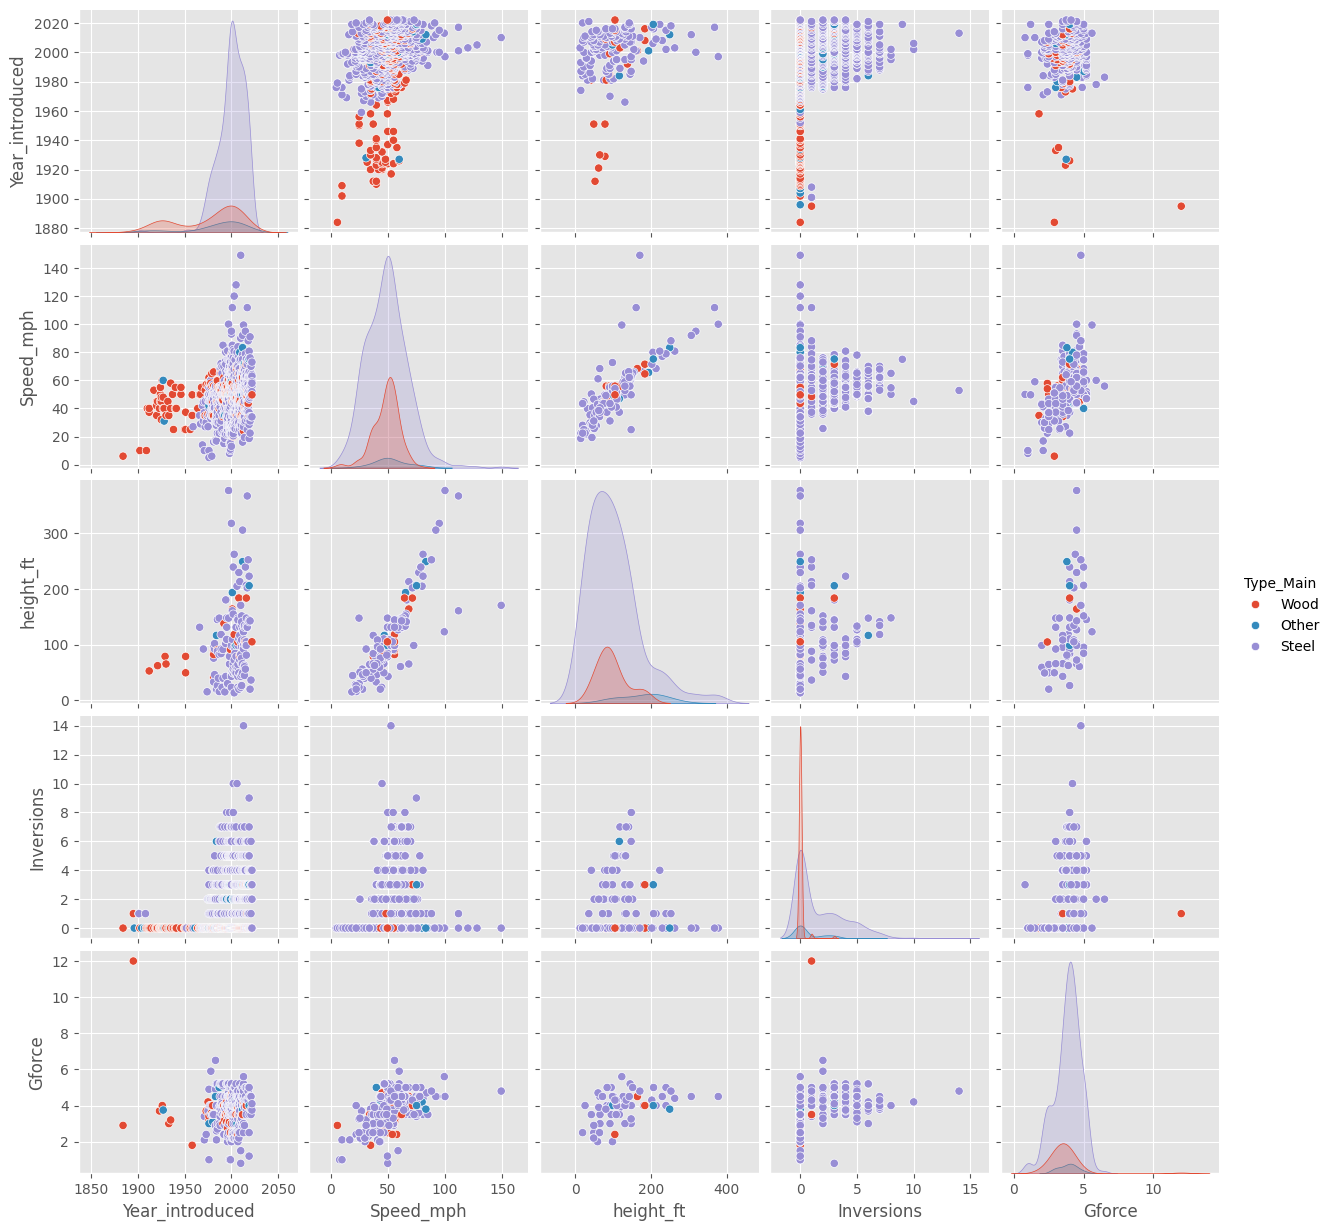

In [47]:
sns.pairplot(data=df,
             vars=['Year_introduced',
                   'Speed_mph',
                   'height_ft',
                   'Inversions',
                   'Gforce'],
             hue='Type_Main')
plt.show()

In [52]:
df_corr = df[['Year_introduced',
              'Speed_mph',
              'height_ft',
              'Inversions',
              'Gforce']].dropna().corr()

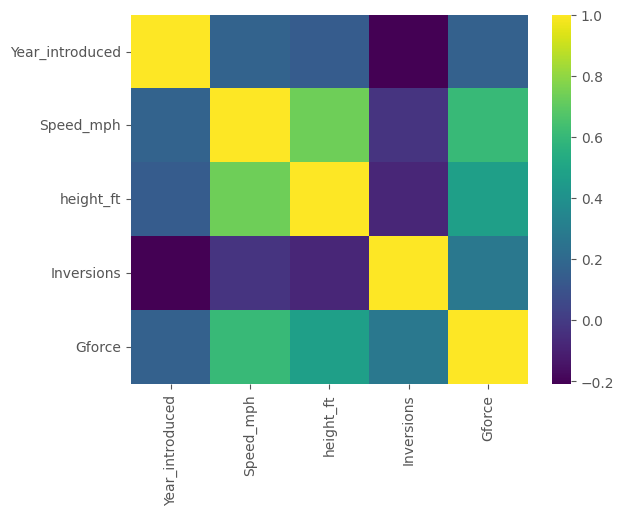

In [57]:
sns.heatmap(df_corr, cmap='viridis')
plt.show()

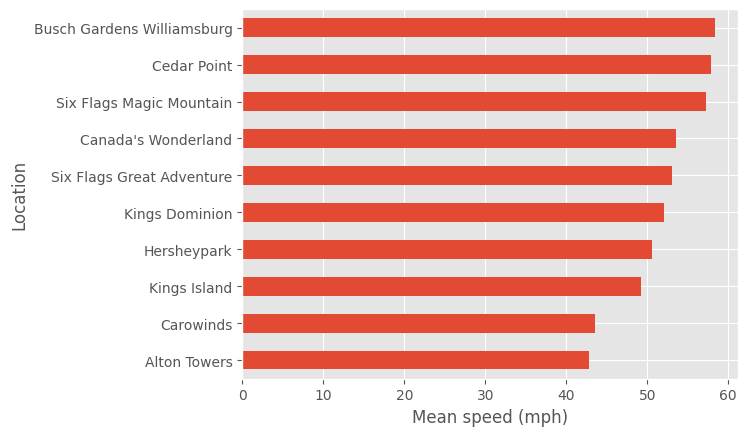

In [88]:
ax = df.query('Location != "Other"') \
    .groupby('Location')['Speed_mph'] \
    .agg(['mean', 'count']) \
    .query('count >= 10') \
    .sort_values(by=['mean'], ascending=True)['mean'] \
    .plot(kind='barh')
ax.set_xlabel('Mean speed (mph)')
plt.show()